In [1]:
# libraries
using Random
Random.seed!(3); # for reproducibility
using Plots
pyplot();

In [2]:
# generate random numbers from uniform [0,1]
unif_numbers = rand(10^4);

""" 
Helper function, finds the index of the sub-interval
x falls in.
"""
function find_interval(intervals, x)
    i = searchsortedlast(intervals, x)
    i == length(intervals) && (i = 0)
    return(i)
end

"""
Partitions the interval [lower, upper] based on
nbins, and count the relative frequencies of rand_nums
in each bin.
"""
function count_frequency(rand_nums, lower=0, upper=1, nbins=20)
    N = length(unif_numbers)
    interval_length = (upper - lower) / nbins
    all_bins = collect(lower:interval_length:upper)
    all_counts = Vector{Float64}(undef, nbins)
    # find which bin each number is in
    all_bin_nums = zeros(0)
    for x in rand_nums
        append!(all_bin_nums, find_interval(all_bins, x))
    end
    all_bin_nums = Vector{Int64}(all_bin_nums)
    # relative frequency
    all_counts = Dict{Int64, Float64}([(i, count(x->x==i, all_bin_nums)) for i in all_bin_nums])
    all_counts = sort(collect(all_counts), by = x->x[1])
    all_counts = Dict{Int64, Float64}([(x[1], x[2]) for x in all_counts])
    all_freq = ( collect(values(all_counts)) / N ) / interval_length
    return(all_freq)
end

count_frequency

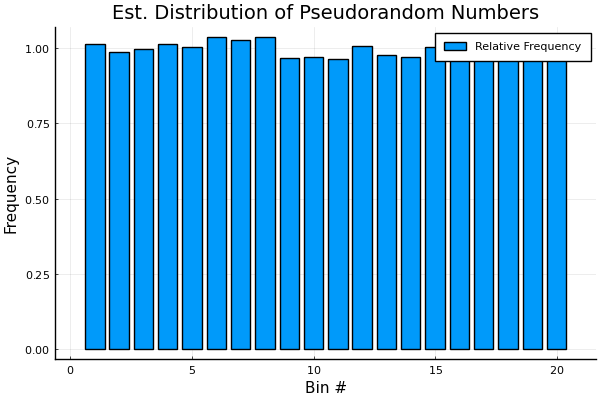

In [5]:
frequencies = count_frequency(unif_numbers);
bar(frequencies, label="Relative Frequency")
title!("Est. Distribution of Pseudorandom Numbers", xlabel="Bin #", ylabel="Frequency")

In [4]:
est_mean = sum(unif_numbers) / length(unif_numbers);
est_variance = sum((unif_numbers .- est_mean).^2) / ( length(unif_numbers) - 1 );
println("*> Est. Mean = ", est_mean)
println("*> Est. Var  = ", est_variance)

*> Est. Mean = 0.49997059832859697
*> Est. Var  = 0.0836583264092236
